# Putting together chunks for preprocessing
1. Use ```glob``` to find all the chunks
2. Run this pipeline for multidataset integration: https://chanzuckerberg.github.io/cellxgene-census/notebooks/analysis_demo/comp_bio_data_integration_scvi.html
2. Run PCA to get ```X_pca``` layer of the data

In [1]:
import cellxgene_census
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import os
from IPython.display import display # easy viewing of dataframes
import glob
from pathlib import Path
import harmonypy
import matplotlib as plt

In [3]:
chunk_datapath = Path("../data/cellxgene_data") # set datapath
chunk_files = glob.glob(str(chunk_datapath) + "/*.h5ad")  # use glob to find all the .h5ad files

# Read all files into a list
adata_list = [sc.read_h5ad(f) for f in chunk_files]

In [ ]:
adata = anndata.concat(adata_list, merge="same") # concatenate adata

In [ ]:
# Set new column batch based on dataset ID
adata.obs["batch"] = adata.obs["dataset_id"].astype(str)  # Ensure it's a string

In [ ]:
adata.write("../data/datasets/cellxgene_covid_pbmc.h5ad")
# Restart kernel at this point

NameError: name 'adata' is not defined

In [2]:
# Check for batch induced clustering
covid_data_read = sc.read_h5ad("../data/datasets/cellxgene_covid_pbmc.h5ad")
covid_data_read # PCA layer is precomputed and exists

/home/s5srinivasan/immune-foundational-model/.venv/lib64/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 4090123 × 61891
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'batch'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'normalized'

In [3]:
np.median(covid_data_read.layers["normalized"].sum(axis=1))

matrix([[0.9999981 , 0.9999986 , 0.99999595, ..., 1.0000036 , 1.0000048 ,
         1.0000144 ]], dtype=float32)

In [ ]:
sc.pp.neighbors(covid_data_read) # compute neighbors
sc.tl.umap(covid_data_read) # compute UMAP - takes ~67 mins

/home/s5srinivasan/immune-foundational-model/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
covid_data_read.uns[""]

['#ffff00',
 '#1ce6ff',
 '#ff34ff',
 '#ff4a46',
 '#008941',
 '#006fa6',
 '#a30059',
 '#ffdbe5',
 '#7a4900',
 '#0000a6',
 '#63ffac',
 '#b79762',
 '#004d43',
 '#8fb0ff',
 '#997d87',
 '#5a0007',
 '#809693',
 '#6a3a4c',
 '#1b4400',
 '#4fc601',
 '#3b5dff',
 '#4a3b53',
 '#ff2f80',
 '#61615a',
 '#ba0900',
 '#6b7900',
 '#00c2a0',
 '#ffaa92',
 '#ff90c9',
 '#b903aa',
 '#d16100',
 '#ddefff',
 '#000035',
 '#7b4f4b',
 '#a1c299',
 '#300018',
 '#0aa6d8',
 '#013349']

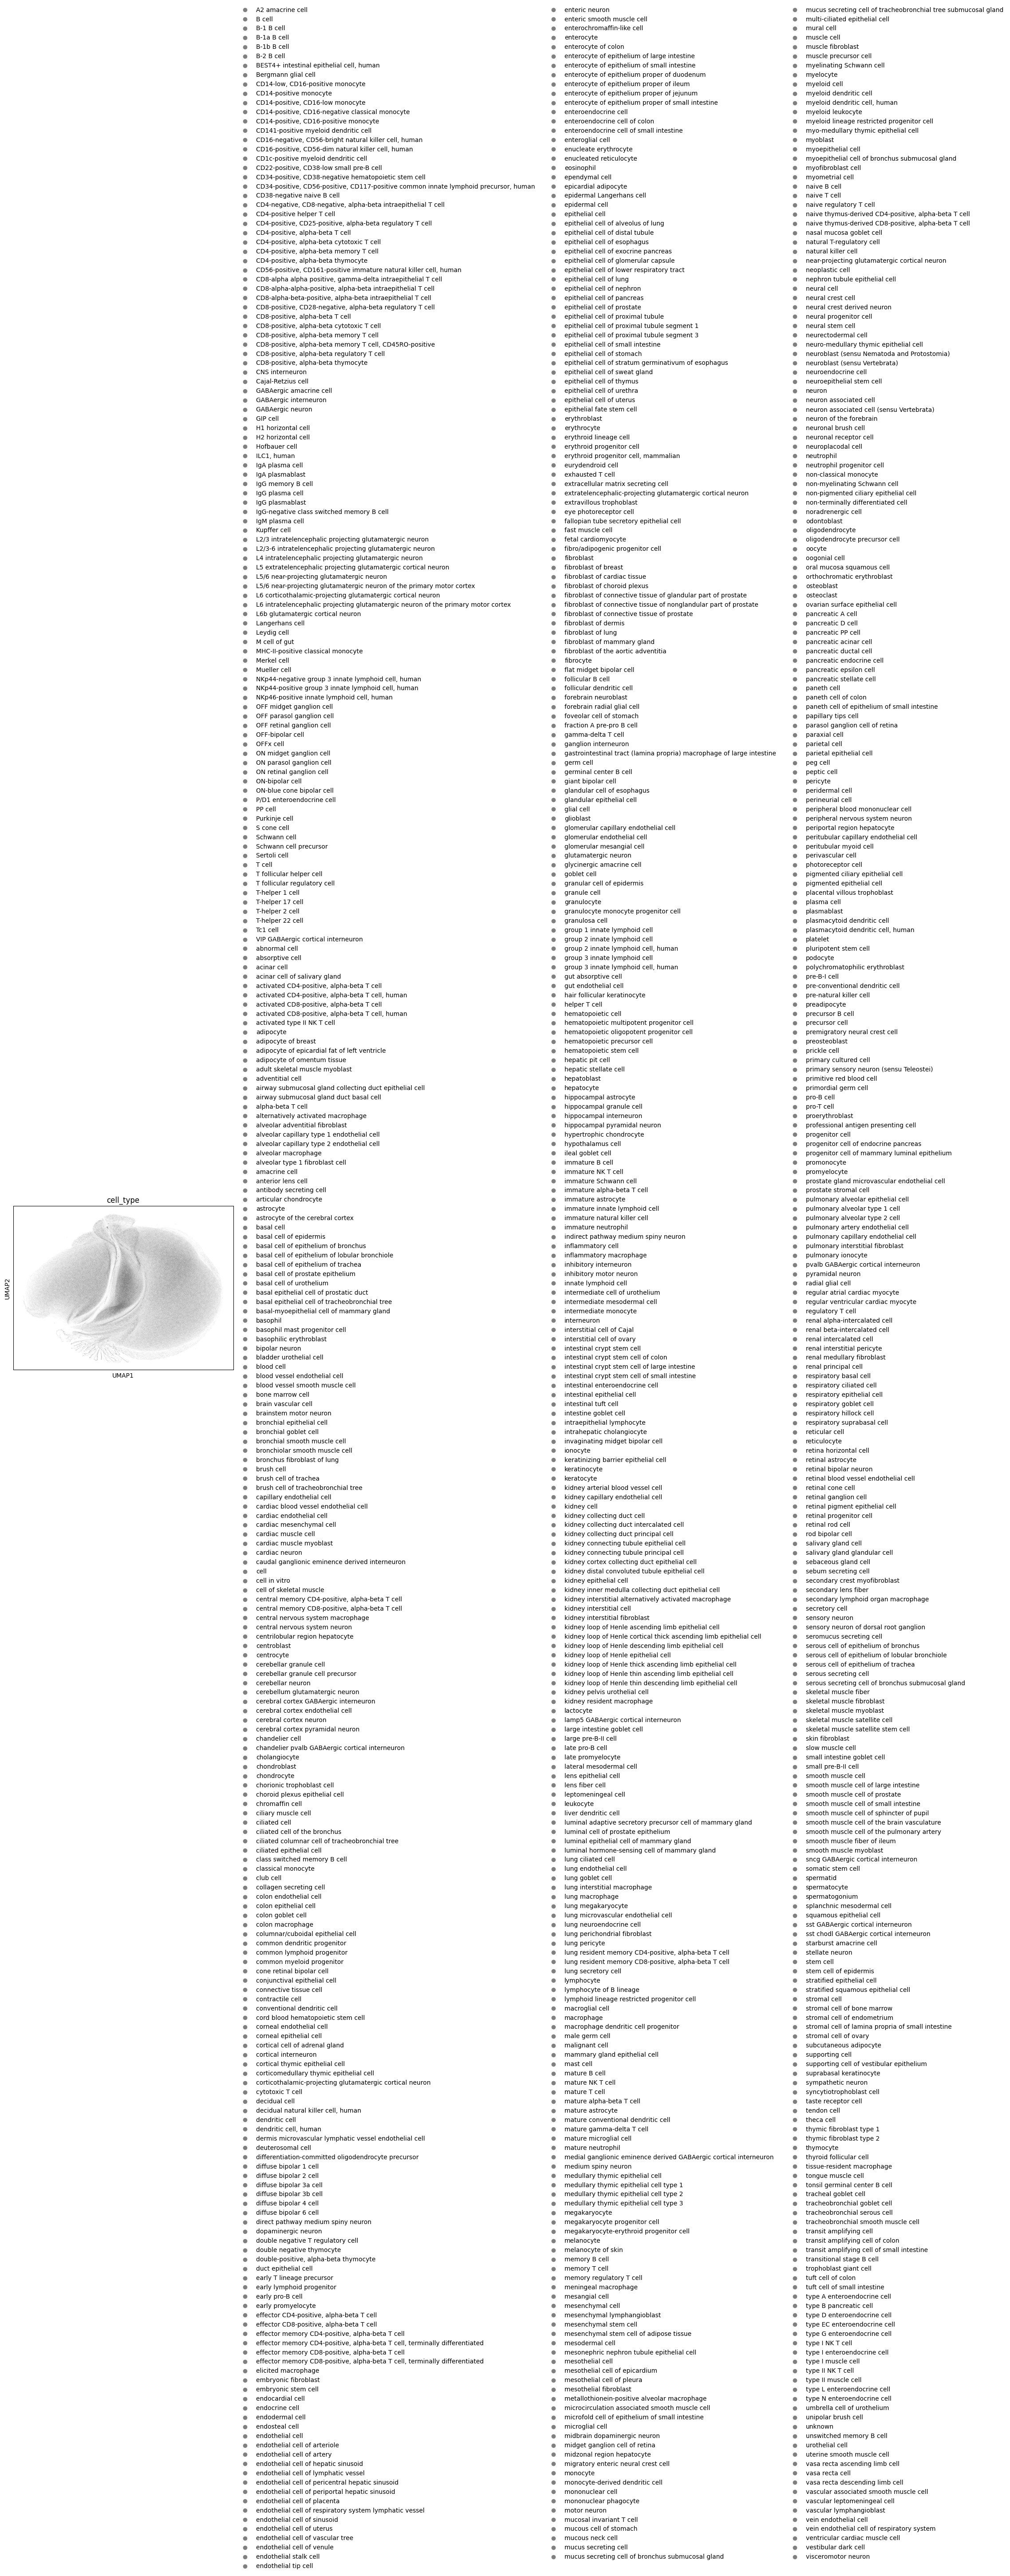

In [12]:
sc.pl.umap(covid_data_read, color=['cell_type'])


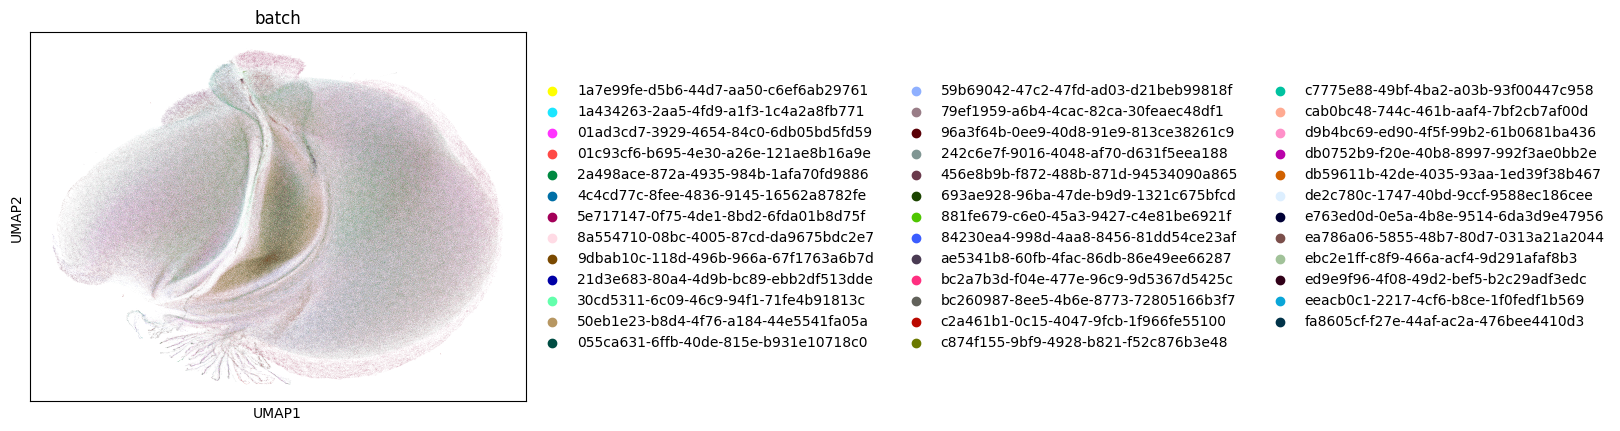

In [14]:
sc.pl.umap(covid_data_read, color=["batch"])


In [ ]:
# import re

# # Case-insensitive search for "CD16" in gene_names
# pattern = re.compile(r"CD16", re.IGNORECASE)
# matched_genes = [gene for gene in gene_names if pattern.search(gene)]

# # Print matched genes
# if matched_genes:
#     print(f"Matched genes: {matched_genes}")
# else:
#     print("No matches found.")

Matched genes: ['CD164L2', 'CD160', 'CD164', 'CD163L1', 'CD163']


In [66]:
chunk_0 = sc.read_h5ad("../data/cellxgene_data/covid_PBMC_chunk4.h5ad")

In [63]:
sc.pp.normalize_total(chunk_0, target_sum=1e4)
sc.pp.log1p(chunk_0)

In [67]:
np.median(chunk_0.layers["normalized"].sum(axis=1))

matrix([[0.99999607, 0.9999932 , 0.99999654, ..., 1.000004  , 1.0000029 ,
         1.0000143 ]], dtype=float32)

In [65]:
np.median(chunk_0.X.sum(axis=1))

matrix([[1344.5199, 1844.7493, 1610.3206, ..., 2847.6265, 3091.0955,
         4326.598 ]], dtype=float32)

In [56]:
sc.pp.pca(chunk_0, n_comps=50)
sc.pp.neighbors(chunk_0, n_neighbors=15, use_rep="X_pca")
sc.tl.umap(chunk_0)

KeyboardInterrupt: 